In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: MS
Digite os 2 primeiros digitos do shapefile: 50


# Importando o shapefile

In [3]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4239 entries, 0 to 4238
Data columns (total 14 columns):
ID            4239 non-null int64
CD_GEOCODI    4239 non-null object
TIPO          4239 non-null object
CD_GEOCODB    1697 non-null object
NM_BAIRRO     1697 non-null object
CD_GEOCODS    4239 non-null object
NM_SUBDIST    1113 non-null object
CD_GEOCODD    4239 non-null object
NM_DISTRIT    4239 non-null object
CD_GEOCODM    4239 non-null object
NM_MUNICIP    4239 non-null object
NM_MICRO      4239 non-null object
NM_MESO       4239 non-null object
geometry      4239 non-null object
dtypes: int64(1), object(13)
memory usage: 463.7+ KB


In [4]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [5]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [6]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(4207, 13)

In [7]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,500020305000001,220.0,737.0,"3,35","2,74","1651,85","5769622,32","1755,58","5950717,88","896,79","2714146,93","1318,81","3436459,82"
1,500020305000002,165.0,539.0,"3,27","2,73","1026,25","1157929,09","1136,45","1157026,32","678,95","2644774,22","1091,41","3805287,13"
2,500020305000003,179.0,584.0,"3,26","2,91","1214,91","2003032,79","1317,99","2037331,76","712,17","1595909,71","1029,38","1981370,05"
3,500020305000004,174.0,536.0,"3,08","2,42","1587,43","5846014,21","1726,33","6119461,72","918,97","2741614,32","1314,41","3403577,32"
4,500020305000005,228.0,689.0,"3,02","1,88","2013,62","31435307,56","2186,21","33763517,66","1159,2","13351470,04","1641,76","18128283,56"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [8]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [9]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [10]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4207 entries, 0 to 4206
Data columns (total 26 columns):
ID            4207 non-null int64
CD_GEOCODI    4207 non-null int64
TIPO          4207 non-null object
CD_GEOCODB    1688 non-null object
NM_BAIRRO     1688 non-null object
CD_GEOCODS    4207 non-null object
NM_SUBDIST    1111 non-null object
CD_GEOCODD    4207 non-null object
NM_DISTRIT    4207 non-null object
CD_GEOCODM    4207 non-null object
NM_MUNICIP    4207 non-null object
NM_MICRO      4207 non-null object
NM_MESO       4207 non-null object
geometry      4207 non-null object
V001          4193 non-null float64
V002          4193 non-null float64
V003          4193 non-null object
V004          4193 non-null object
V005          4193 non-null object
V006          4193 non-null object
V007          4193 non-null object
V008          4193 non-null object
V009          4207 non-null object
V010          4207 non-null object
V011          4203 non-null object
V012      

In [11]:
del gdf
del dados

Text(0.5,1,'MS')

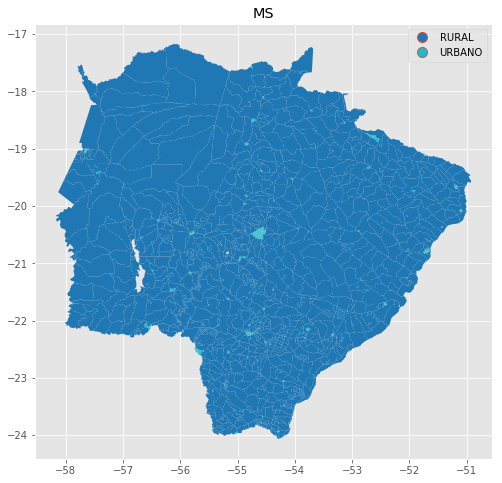

In [12]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [13]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [14]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [15]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [16]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [17]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
201,AngÃ©lica,MS,9.067,5000856.0,(POLYGON ((-53.79439169711308 -22.159864277227...,9.067110
3587,AntÃ´nio JoÃ£o,MS,4.560,5000906.0,(POLYGON ((-56.0434802916119 -22.2094392789104...,4.560006
3992,Coronel Sapucaia,MS,3.881,5003157.0,POLYGON ((-55.54491460166932 -23.2745938288201...,3.880629
4022,Ãgua Clara,MS,7.326,5000203.0,(POLYGON ((-52.87898501689338 -20.429690402863...,7.325521
4023,AlcinÃ³polis,MS,3.186,5000252.0,POLYGON ((-53.72245729337971 -18.3313917550807...,3.185643


In [18]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 77 entries, 201 to 4096
Data columns (total 6 columns):
Municipio     77 non-null object
UF            77 non-null object
Area_Urb      77 non-null float64
CD_GEOCODM    77 non-null int64
geometry      77 non-null object
Area          77 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.2+ KB


In [19]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no MS')

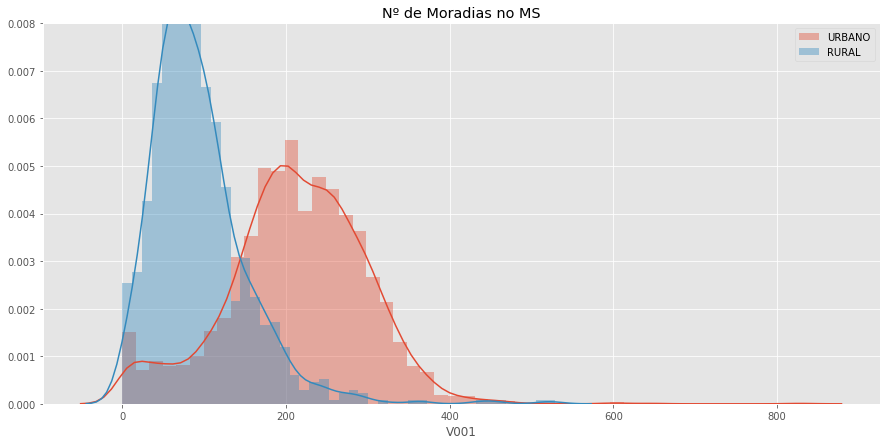

In [20]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [21]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    1111.000000
mean       93.660666
std        59.695844
min         0.000000
25%        54.500000
50%        83.000000
75%       118.000000
max       529.000000
Name: V001, dtype: float64
URBANO 
 count    3096.000000
mean      211.641473
std        84.686555
min         0.000000
25%       164.000000
50%       212.000000
75%       268.000000
max       828.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

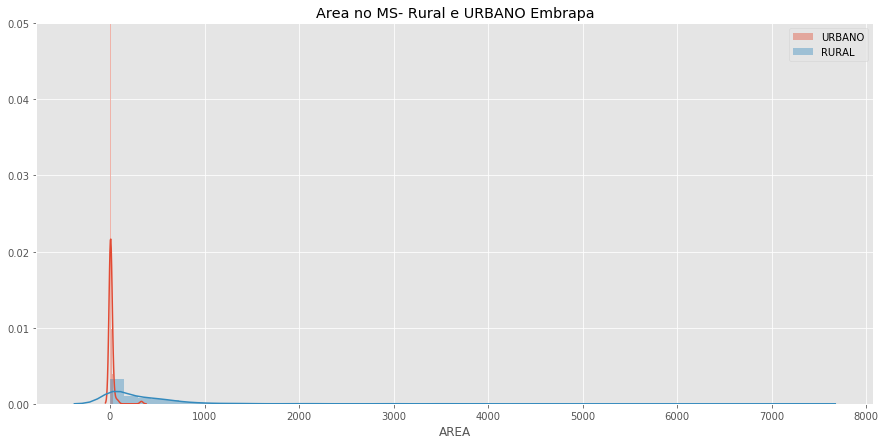

In [22]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [23]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

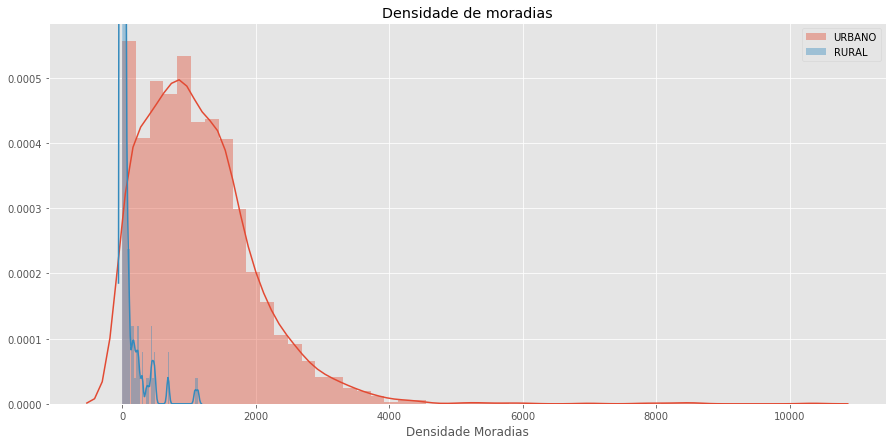

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [25]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    1111.000000
mean       13.794499
std        71.778565
min         0.000000
25%         0.159181
50%         0.424391
75%         3.423044
max      1135.858816
Name: Densidade Moradias, dtype: float64
URBANO 
 count     3096.000000
mean      1148.340559
std        876.796321
min          0.000000
25%        518.440957
50%       1015.019356
75%       1577.617217
max      10345.438391
Name: Densidade Moradias, dtype: float64


In [26]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000
mean,15082.750000,5.002640e+14,194.250000,652.250000,0.225975,902.072471
std,1849.328234,3.517318e+11,32.785922,125.183532,0.059359,246.409684
min,14033.000000,5.000609e+14,166.000000,506.000000,0.146145,687.445451
25%,14104.250000,5.000758e+14,173.500000,569.000000,0.201063,690.064711
50%,14223.500000,5.001025e+14,185.500000,672.000000,0.237048,892.492808
75%,15202.000000,5.002908e+14,206.250000,755.250000,0.261959,1104.500567
max,17851.000000,5.007901e+14,240.000000,759.000000,0.283659,1135.858816


## Descrição da área por setor censitários urbanos e rurais

In [27]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count     77.000000
mean      13.644030
std       39.045484
min        0.832941
25%        3.104948
50%        6.118389
75%        9.804792
max      332.474197
Name: Area, dtype: float64
RURAL 
 count    1111.000000
mean      318.828027
std       511.076173
min         0.017286
25%        24.899558
50%       167.902734
75%       451.348798
max      7296.364499
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

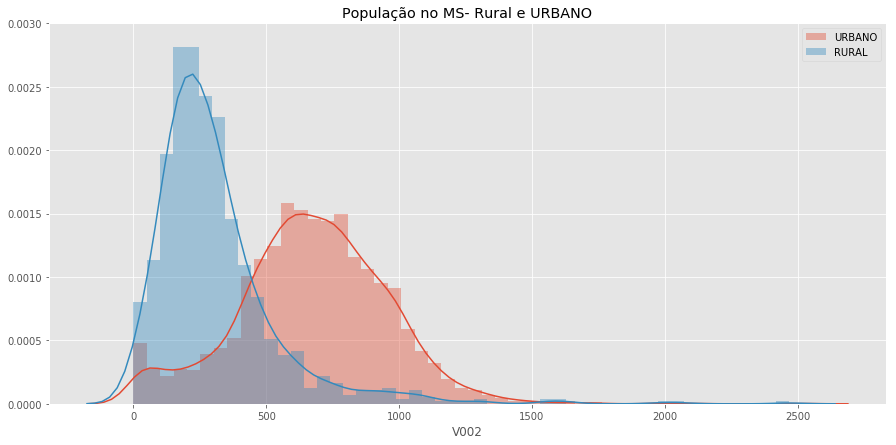

In [28]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [29]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    1111.000000
mean      308.747975
std       237.029613
min         0.000000
25%       169.000000
50%       258.000000
75%       371.500000
max      2466.000000
Name: V002, dtype: float64
URBANO 
 count    3096.000000
mean      672.531331
std       281.337959
min         0.000000
25%       502.000000
50%       671.000000
75%       855.000000
max      2520.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [30]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [31]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [32]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,1.0,1.000000e+00,1.0,1.0,1.000000,1.000000
mean,17851.0,5.007901e+14,240.0,759.0,0.219369,1094.047818
std,NaN,NaN,NaN,NaN,NaN,NaN
min,17851.0,5.007901e+14,240.0,759.0,0.219369,1094.047818
25%,17851.0,5.007901e+14,240.0,759.0,0.219369,1094.047818
50%,17851.0,5.007901e+14,240.0,759.0,0.219369,1094.047818
75%,17851.0,5.007901e+14,240.0,759.0,0.219369,1094.047818
max,17851.0,5.007901e+14,240.0,759.0,0.219369,1094.047818


Text(0.5,1,'SCRCU - Por Município')

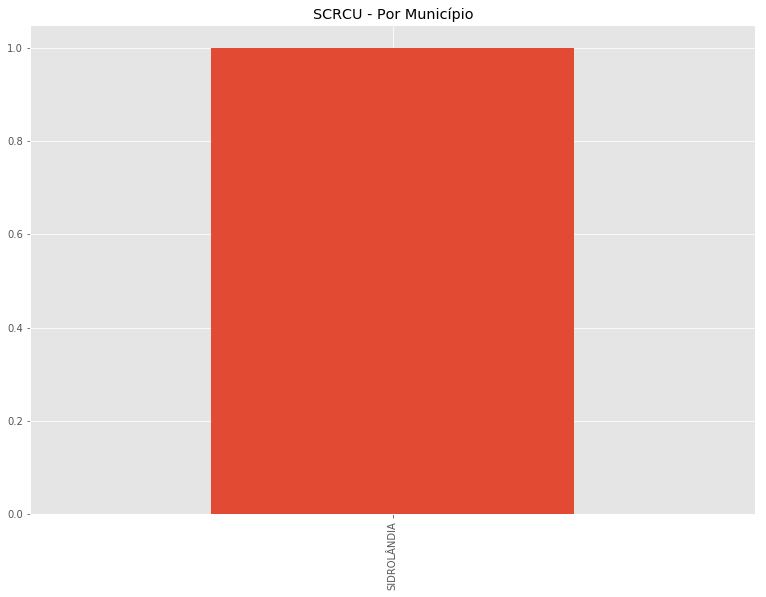

In [33]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


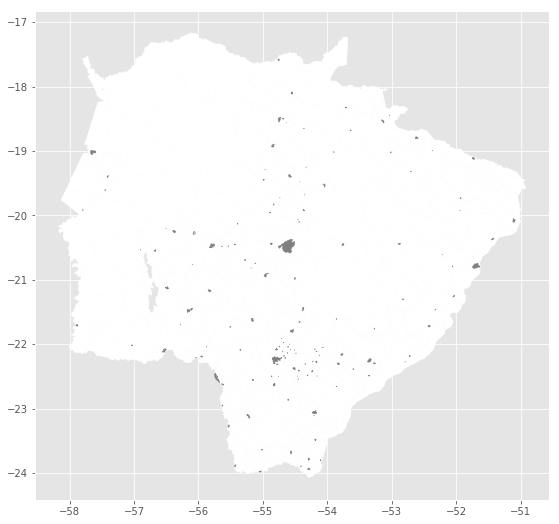

In [34]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [35]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [36]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [37]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [39]:
regioes_urbanas_df.head()

,geometry,FONTE
3879,POLYGON ((-54.96337117622929 -20.9224714841076...,1.0
201,(POLYGON ((-53.79439169711308 -22.159864277227...,0.0
3587,(POLYGON ((-56.0434802916119 -22.2094392789104...,0.0
3992,POLYGON ((-55.54491460166932 -23.2745938288201...,0.0
4022,(POLYGON ((-52.87898501689338 -20.429690402863...,0.0


In [40]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [41]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [42]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)